<Figure size 640x480 with 0 Axes>

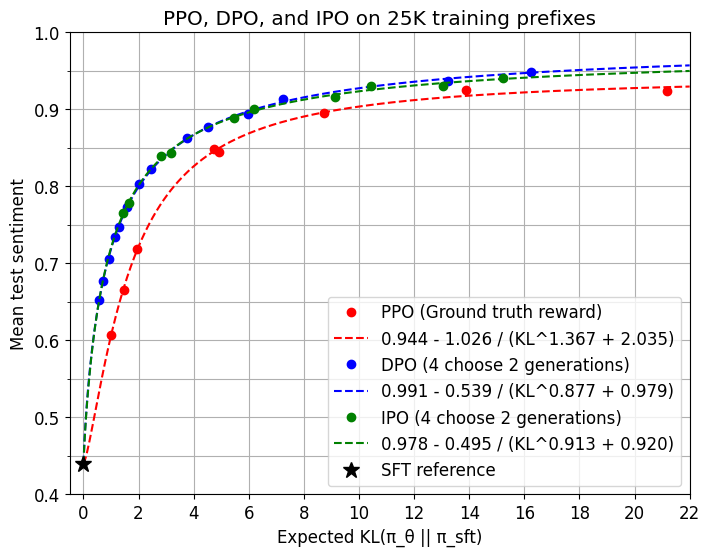

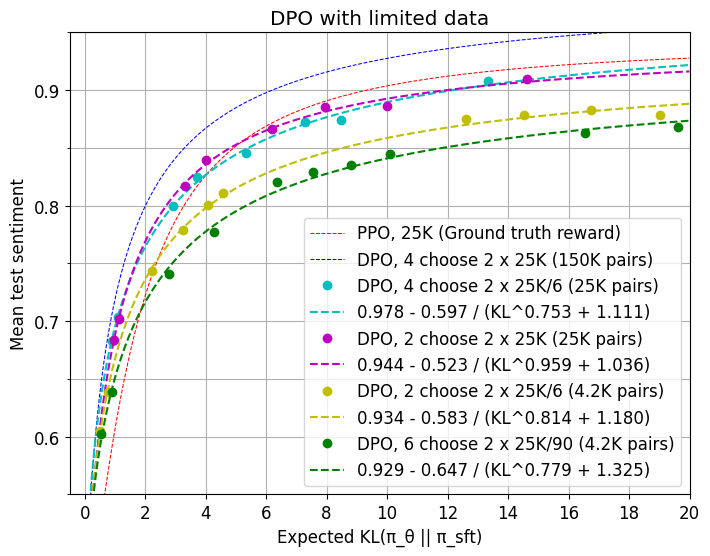

()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import io
import pandas as pd
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
import matplotlib

plt.clf()
xdpo = [
  # 15.83016726, # Not included because it used a higher learning rate, strange and warrants further investigation but does not change our findings.
  16.243880899002153,
  13.215453798365262,
  7.246024739,
  5.969549455,
  4.515421569,
  3.761323535,
  2.440119527,
  2.017536204,
  1.588683995,
  1.301878966,
  1.160596904,
  0.9292055997,
  0.7139764306,
  0.5468901008,
]
ydpo = [
  # 0.9665822744,
  0.9489936448758525,
  0.9365258436400458,
  0.9134458752,
  0.8943274635,
  0.8774647004,
  0.8634923081,
  0.8232242557,
  0.8029241733,
  0.7728171585,
  0.7471250237,
  0.7343080465,
  0.7063676356,
  0.677210121,
  0.6524214434,
]
ppo = pd.read_csv(io.StringIO('''
0.7044237161,0.5515945703
1.649919114,0.6370517591
3.059561392,0.7518565506
0.4212051,0.4965890827
6.200068052,0.8273591113
18.40117489,0.9045550312
10.99326032,0.8761637723
'''), header=None)

ipo = pd.read_csv(io.StringIO('''
10.43820504,,,,0.9309203575
9.133908378,,,,0.9157944924
6.185308412,,,,0.9003152413
5.460094431,,,,0.8884296325
3.179255146,,,,0.8438052224
2.80752616,,,,0.8401381701
1.640588599,,,,0.7784877918
1.451483102,,,,0.7653750393
15.21929592,,,,0.9408321871
13.03277836,,,,0.9307536026
'''), header=None)

dpo4c2 = pd.read_csv(io.StringIO('''
,,epoch 4,0.2,0.8251224297,0.0078184807,3.703912032
,,epoch 3,0.2,0.7997476692,0.008239322242,2.932891149
,,epoch 2,0.2,0.7448346712,0.008979632829,1.818640458
,,epoch 1,0.2,0.6038798631,0.01007472152,0.4249751591
,,epoch 4,0.6,0.7034085925,0.009392748341,1.091803721
,,epoch 3,0.6,0.6832316088,0.009573438578,0.8942583804
,,epoch 2,0.6,0.6412283496,0.009876015462,0.636427472
,,epoch 1,0.6,0.567551152,0.01020648718,0.2662105659
,,epoch 4,0.1,0.872580433,0.006850082825,7.281893461
,,epoch 3,0.1,0.8456363808,0.007433383531,5.322484683
,,epoch 2,0.1,0.7830030562,0.008483663746,2.798561468
,,epoch 1,0.1,0.6136052997,0.01003582925,0.482405251
,,epoch 4,0.05,0.9076462871,0.005949505143,13.34425616
,,epoch 3,0.05,0.8745304618,0.006809439805,8.468875795
,,epoch 2,0.05,0.804560948,0.008166332079,3.604722443
,,epoch 1,0.05,0.6188991401,0.01000873217,0.516088797
'''), header=None)

dpo4c2 = dpo4c2.loc[~dpo4c2[2].isin(['epoch 1', 'epoch 2'])]
dpo2c2 = pd.read_csv(io.StringIO('''
dpo_4c2_div6-0_6-2024.05.28.09.13,actually 2c2,epoch 4,0.6,0.7022466787,0.009405477828,1.132867876
dpo_4c2_div6-0_6-2024.05.28.09.13,actually 2c2,epoch 3,0.6,0.6837341191,0.009563220501,0.9652410748
dpo_4c2_div6-0_6-2024.05.28.09.13,actually 2c2,epoch 2,0.6,0.6551263226,0.009788761162,0.7268613448
dpo_4c2_div6-0_6-2024.05.28.09.13,actually 2c2,epoch 1,0.6,0.5806579814,0.01016944244,0.3220195573
dpo_4c2_div6-0_2-2024.05.28.10.22,actually 2c2,epoch 4,0.2,0.8398897485,0.007539630909,4.025207035
dpo_4c2_div6-0_2-2024.05.28.10.22,actually 2c2,epoch 3,0.2,0.8166960808,0.007959873962,3.314099076
dpo_4c2_div6-0_2-2024.05.28.10.22,actually 2c2,epoch 2,0.2,0.7637499974,0.008743949515,2.143915453
dpo_4c2_div6-0_2-2024.05.28.10.22,actually 2c2,epoch 1,0.2,0.6164311436,0.01001755334,0.5498595498
dpo_4c2_div6-0_1-2024.05.29.09.23,actually 2c2,epoch 4,0.1,0.8852109093,0.0065559523,7.942126693
dpo_4c2_div6-0_1-2024.05.29.09.23,actually 2c2,epoch 3,0.1,0.8664879618,0.006990641961,6.187944956
dpo_4c2_div6-0_1-2024.05.29.09.23,actually 2c2,epoch 2,0.1,0.8107034647,0.008073459573,3.416195799
dpo_4c2_div6-0_1-2024.05.29.09.23,actually 2c2,epoch 1,0.1,0.6227253422,0.009992607761,0.6326338683
dpo_2c2_div6-0_05-2024.05.30.11.41,,epoch 4,0.05,0.9096902038,0.005892493407,14.61233374
dpo_2c2_div6-0_05-2024.05.30.11.41,,epoch 3,0.05,0.886079643,0.00653233973,9.990667836
dpo_2c2_div6-0_05-2024.05.30.11.41,,epoch 2,0.05,0.8297689638,0.007745899742,4.493417338
dpo_2c2_div6-0_05-2024.05.30.11.41,,epoch 1,0.05,0.6287208651,0.009961287182,0.6803215284
'''), header=None)

dpo2c2 = dpo2c2.loc[~dpo2c2[2].isin(['epoch 1', 'epoch 2'])]
dpo2c2_div36 = pd.read_csv(io.StringIO('''
,,epoch 20,0.05,0.8782325539,0.006726347725,19.03408677,0.1067108004
,,epoch 19,0.05,0.8831101356,0.006607416825,16.72606382,0.09464116741
,,epoch 18,0.05,0.878348449,0.006712514979,14.51142393,0.08334537022
,,epoch 17,0.05,0.875354714,0.006775894062,12.60143524,0.07327546035
dpo_2c2_div36-0_2-2024.05.31.11.55,maybe too many epochs,epoch 17,0.2,0.8111752816,0.008039602098,4.57166138,0.02937998193
dpo_2c2_div36-0_2-2024.05.31.11.55,maybe too many epochs,epoch 16,0.2,0.8009917251,0.008204822561,4.082947927,0.02690810359
dpo_2c2_div36-0_2-2024.05.31.12.56,,epoch 14,0.2,0.7788095767,0.00853407536,3.261297513,0.02336270031
dpo_2c2_div36-0_2-2024.05.31.12.56,,epoch 11,0.2,0.7435291696,0.008991659374,2.241380537,0.01848641379
dpo_2c2_div36-0_6-2024.05.31.22.06,,epoch 10,0.6,0.6391212525,0.009897906565,0.7726878673,0.007736882676
dpo_2c2_div36-0_6-2024.05.31.22.06,,epoch 7,0.6,0.6048722145,0.01006853441,0.5006596317,0.005610986144
'''), header=None)
# dpo_2c2_div36-0_2-2024.05.31.12.56,,epoch 13,0.2,0.7666216387,0.008698218593,2.906866665,0.02186094821
# dpo_2c2_div36-0_2-2024.05.31.12.56,,epoch 12,0.2,0.7518777677,0.008889930636,2.580733754,0.02035531769
# dpo_2c2_div36-0_6-2024.05.31.22.06,,epoch 9,0.6,0.6351716099,0.009912935463,0.6774464803,0.007005335718
# dpo_2c2_div36-0_6-2024.05.31.22.06,,epoch 8,0.6,0.6213208134,0.009984045052,0.5946950046,0.006450082792
# dpo_2c2_div36-0_2-2024.05.31.11.55,maybe too many epochs,epoch 19,0.2,0.8178204302,0.007926379481,5.660540783,0.03534844732
# dpo_2c2_div36-0_2-2024.05.31.11.55,maybe too many epochs,epoch 18,0.2,0.8129269576,0.008002709685,5.053134166,0.03146221008

dpo6c2_div36 = pd.read_csv(io.StringIO('''
dpo_6c2_div36-0_6-2024.05.31.22.34,,epoch 10,0.6,0.6385935934,0.009902939774,0.9062292807,0.008063932997
dpo_6c2_div36-0_6-2024.05.31.22.34,,epoch 7,0.6,0.6025706214,0.01009305596,0.5493974553,0.005343837302
dpo_6c2_div36-0_2-2024.05.31.23.20,,epoch 14,0.2,0.7769019584,0.008558729777,4.265136511,0.02762386245
dpo_6c2_div36-0_2-2024.05.31.23.20,,epoch 11,0.2,0.7410854388,0.009018999181,2.793973121,0.01990478701
,,epoch 17,0.05,0.8677279398,0.006962955738,19.63227299,0.1155396118
,,epoch 16,0.05,0.8633566347,0.007057235959,16.5464655,0.09654726721
dpo_6c2_div36-0_1-2024.06.01.01.16,,epoch 16,0.1,0.8451534758,0.007423066112,10.09517483,0.05907065663
dpo_6c2_div36-0_1-2024.06.01.01.16,,epoch 15,0.1,0.8352354859,0.007611316948,8.792581969,0.05299333821
dpo_6c2_div36-0_1-2024.06.01.01.16,,epoch 14,0.1,0.8290229679,0.007715817552,7.537266091,0.04647814974
dpo_6c2_div36-0_1-2024.06.01.01.16,,epoch 13,0.1,0.8201620474,0.007888089728,6.354444557,0.03956816006
'''), header=None)
# dpo_6c2_div36-0_2-2024.05.31.23.20,,epoch 13,0.2,0.7611028815,0.008772539337,3.730523339,0.02501001519
# dpo_6c2_div36-0_2-2024.05.31.23.20,,epoch 12,0.2,0.7469752771,0.008953612055,3.258759907,0.0223775553
# dpo_6c2_div36-0_6-2024.05.31.22.34,,epoch 9,0.6,0.6243047529,0.009981774045,0.7716832702,0.007057091882
# dpo_6c2_div36-0_6-2024.05.31.22.34,,epoch 8,0.6,0.6125855621,0.01003796686,0.6596172493,0.00625429468

dpoU25 = pd.read_csv(io.StringIO('''
dpo_uniform_flipped_2c2_0_25-0_2-2024.06.01.13.44,0.2,epoch 4,0.6909411944,0.009507316826,1.299660863,0.01248277163
dpo_uniform_flipped_2c2_0_25-0_2-2024.06.01.13.44,0.2,epoch 3,0.6717172297,0.009666915802,1.014849248,0.01064040997
dpo_uniform_flipped_2c2_0_25-0_2-2024.06.01.13.44,0.2,epoch 2,0.6255046376,0.009963271935,0.6364083042,0.007146672395
dpo_uniform_flipped_2c2_0_25-0_05-2024.06.01.14.15,0.05,epoch 4,0.8323854191,0.007682842753,4.884572191,0.03693577123
dpo_uniform_flipped_2c2_0_25-0_05-2024.06.01.14.15,0.05,epoch 3,0.7918243391,0.008365372362,3.040027026,0.0256882972
dpo_uniform_flipped_2c2_0_25-0_05-2024.06.01.14.15,0.05,epoch 2,0.6903473589,0.009538753631,1.295401474,0.01283174065
'''), header=None)

ppo_normed = pd.read_csv(io.StringIO('''
roberta16-256_0_1-normalize-2024.06.02.02.46,0.2,0.8446665342,0.007455636395,4.937010258,0.02856906483
roberta16-256_0_02-normalize-2024.06.02.04.16,0.02,0.9245505925,0.005409591836,21.16130341,0.1121503829
roberta16-256_0_5-normalize-2024.06.02.05.54,0.5,0.6066623135,0.01005996707,1.003932697,0.005585509014
roberta16-256_0_1-normalize-2024.06.02.11.08,0.1,0.8483818693,0.00738094565,4.727235646,0.02789208302
roberta16-256_0_05-normalize-2024.06.02.07.07,0.05,0.8949065483,0.006304971008,8.712891725,0.04783457073
roberta16-256_0_03-normalize-2024.06.02.22.36,0.03,0.9249224824,0.005405681508,13.89792127,0.07433752411
roberta16-256_0_35-normalize-2024.06.04.06.57,0.35,0.6652483590143371,0.00972262000479483,1.4551625790384908,0.008816352162108873
roberta16-256_0_27-normalize-2024.06.04.09.30,0.27,0.7187272022476034,0.009260483978105718,1.9270481507863022,0.012664874892455116
'''), header=None)

ppo_gamma =  pd.read_csv(io.StringIO('''
roberta16-256_0_2-gamma-2024.06.06.08.54,0.2,epoch 1,0.7069906045084685,0.009362169715827524,2.0597941090818495,0.0129063572005253,15.58203125
roberta16-256_0_05-gamma-2024.06.06.07.59,0.05,epoch 1,0.8855598840508492,0.006513017628692393,18.126629722615082,0.07264026919305748,7.351128472222222
roberta16-256_0_5-gamma-2024.06.06.09.49,0.5,epoch 1,0.5716139171891856,0.010202767907510542,0.8287039782153443,0.004859602379516957,15.504340277777779
roberta16-256_0_07-gamma-2024.06.07.07.04,0.07,epoch 1,0.8473781381034592,0.0073962995852119425,7.9587870391292705,0.04322167353295598,12.001302083333334
roberta16-256_0_1-gamma-2024.06.07.05.37,0.1,epoch 1,0.8138318924538149,0.008006521118565804,4.687330310905559,0.027318531038272822,14.184461805555555
'''), header=None)

def makeplot(title, tuples, yrange=[0.4, 1.0], xrange=[-0.5, 20], figsize=[8, 6], oglw=None):
  matplotlib.rc('font', size=12)
  lw = oglw if oglw else 1.5
  ms = 6
  fig, ax = plt.subplots(figsize=figsize)
  plt.title(title)
  lin = np.linspace(0, xrange[1], 500)

  def func(x, a, b, c, d):
    return a + -b/(x**c + d)#/(x+c)

  def plot(x, y, color, label, curveonly=False, curve=True):
    if not curveonly:
      ax.plot(x, y, color=color, marker=f"o", linestyle='none', label=label, markersize=ms)
    if curve:
      x = [0, *x]
      y = [0.44, *y]
      vars, pcov = curve_fit(func, x, y)
      if not curveonly:
        label = '%5.3f - %5.3f / (KL^%5.3f + %5.3f)' % tuple(vars)
      ax.plot(lin, func(lin, *vars), color=color, linestyle='dashed', linewidth=lw / (2 if curveonly and not oglw else 1),
                label=label)

  for tup in tuples:
    plot(*tup)
  if yrange[0] < 0.44:
    ax.plot(0, 0.44, color='k', marker='*', label='SFT reference', linestyle='none', markersize=2*ms)

  # plot(dpo4c2[6], dpo4c2[4], 'c', 'DPO4c2')
  # plot(dpo2c2[6], dpo2c2[4], 'm', 'DPO2c2')
  # plot(dpo2c2_div36[6], dpo2c2_div36[4], 'y', 'DPO2c2/36')
  # plot(dpo6c2_div36[6], dpo6c2_div36[4], 'k', 'DPO6c2/36')
  # plot(dpoU25[5], dpoU25[3], 'tab:orange', 'DPO U25')
  # plt.plot(ppo['0'], ppo['1'], 'ro')
  # curve_fit(func, , ydpo)
  # plt.plot(lin, func(lin, *dpo), 'b--',
  #          label='fit: a=%5.3f, b=%5.3f, c=%5.3f d=%5.3f' % tuple(dpo))
  ax.grid(which='both')
  # plt.axis
  ax.yaxis.set_minor_locator(MultipleLocator(0.05))
  ax.yaxis.set_major_locator(MultipleLocator(0.1))
  ax.xaxis.set_major_locator(MultipleLocator(2))
  ax.set_ylim(yrange)
  ax.set_xlim(xrange)
  plt.xlabel('Expected KL(π_θ || π_sft)')
  plt.ylabel('Mean test sentiment')
  ax.legend()
  plt.show()


makeplot("PPO, DPO, and IPO on 25K training prefixes", [
  (ppo_normed[4], ppo_normed[2], 'r', 'PPO (Ground truth reward)'),
  (xdpo, ydpo, 'b', 'DPO (4 choose 2 generations)'),
  (ipo[0], ipo[4], 'g', 'IPO (4 choose 2 generations)'),

], xrange=[-0.5, 22])

makeplot("DPO with limited data", [
  (ppo_normed[4], ppo_normed[2], 'r', 'PPO, 25K (Ground truth reward)', True),
    # ax.plot(4.937010257711841, 0.8446665342103441, color='k', marker='*', label='SFT reference', linestyle='none', markersize=2*ms)
  (xdpo, ydpo, 'b', 'DPO, 4 choose 2 x 25K (150K pairs)', True),
  (dpo4c2[6], dpo4c2[4], 'c', 'DPO, 4 choose 2 x 25K/6 (25K pairs)'),
  (dpo2c2[6], dpo2c2[4], 'm', 'DPO, 2 choose 2 x 25K (25K pairs)'),
  (dpo2c2_div36[6], dpo2c2_div36[4], 'y', 'DPO, 2 choose 2 x 25K/6 (4.2K pairs)'),
  (dpo6c2_div36[6], dpo6c2_div36[4], 'g', 'DPO, 6 choose 2 x 25K/90 (4.2K pairs)'),
], [0.55, 0.95])
  # (ppo[0], ppo[1], 'r', 'PPO (Ground truth reward)'),
  # (ppo[0], ppo[1], 'r', 'PPO 25K (Ground truth reward)', True),

/


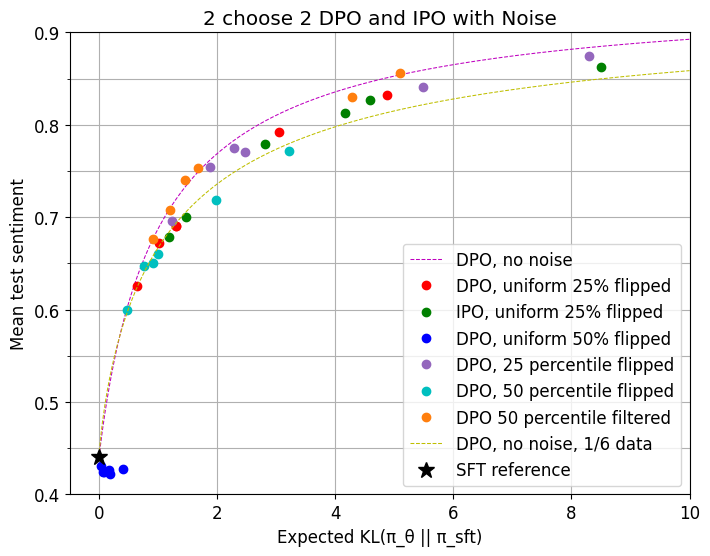

In [ ]:
dpo_uniform_25 = pd.read_csv(io.StringIO('''
dpo_uniform_flipped_2c2_0_25-0_2-2024.06.01.13.44,0.2,epoch 4,0.6909411944,0.009507316826,1.299660863,0.01248277163
dpo_uniform_flipped_2c2_0_25-0_2-2024.06.01.13.44,0.2,epoch 3,0.6717172297,0.009666915802,1.014849248,0.01064040997
dpo_uniform_flipped_2c2_0_25-0_2-2024.06.01.13.44,0.2,epoch 2,0.6255046376,0.009963271935,0.6364083042,0.007146672395
dpo_uniform_flipped_2c2_0_25-0_05-2024.06.01.14.15,0.05,epoch 4,0.8323854191,0.007682842753,4.884572191,0.03693577123
dpo_uniform_flipped_2c2_0_25-0_05-2024.06.01.14.15,0.05,epoch 3,0.7918243391,0.008365372362,3.040027026,0.0256882972
dpo_uniform_flipped_2c2_0_25-0_05-2024.06.01.14.15,0.05,epoch 2,0.6903473589,0.009538753631,1.295401474,0.01283174065
'''), header=None)


dpo_uniform_50 = pd.read_csv(io.StringIO('''
dpo_uniform_flipped_2c2_0_5-0_05-2024.06.01.14.45,0.05,epoch 4,0.4275610004,0.01019728364,0.4073311914,0.003104527351
dpo_uniform_flipped_2c2_0_5-0_05-2024.06.01.14.45,0.05,epoch 3,0.4259943659,0.01018870724,0.1672278706,0.001153157622
dpo_uniform_flipped_2c2_0_5-0_05-2024.06.01.14.45,0.05,epoch 2,0.4247845034,0.01017978073,0.05861799553,0.0004332960216
dpo_uniform_flipped_2c2_0_5-0_2-2024.06.01.15.15,0.2,epoch 4,0.4225252041,0.01018210385,0.1848323845,0.001319008428
dpo_uniform_flipped_2c2_0_5-0_2-2024.06.01.15.15,0.2,epoch 3,0.4237849044,0.01018116683,0.08961368063,0.000604251453
dpo_uniform_flipped_2c2_0_5-0_2-2024.06.01.15.15,0.2,epoch 2,0.4313326895,0.0101933914,0.03584214298,0.0002439816229
'''), header=None)

dpo_quantile_25 = pd.read_csv(io.StringIO('''
dpo_quantile_flipped_2c2_0_25-0_05-2024.06.02.02.19,0.05,epoch 4,0.8742044734,0.006816160869,8.28930475,0.05552114056
dpo_quantile_flipped_2c2_0_25-0_05-2024.06.02.02.19,0.05,epoch 3,0.840866209,0.007522814808,5.483096217,0.04143771578
dpo_quantile_flipped_2c2_0_25-0_05-2024.06.02.02.19,0.05,epoch 2,0.7701895806,0.00866795587,2.466437717,0.02193890132
dpo_quantile_flipped_2c2_0_25-0_2-2024.06.02.02.50,0.2,epoch 4,0.7752012314,0.008597936239,2.28814689,0.01888238546
dpo_quantile_flipped_2c2_0_25-0_2-2024.06.02.02.50,0.2,epoch 3,0.7540421556,0.008864838728,1.887029987,0.01700664119
dpo_quantile_flipped_2c2_0_25-0_2-2024.06.02.02.50,0.2,epoch 2,0.6960019613,0.009470209788,1.227504762,0.01253491984
'''), header=None)

dpo_quantile_50 = pd.read_csv(io.StringIO('''
dpo_quantile_flipped_2c2_0_5-0_05-2024.06.02.03.20,0.05,epoch 4,0.7714807524,0.008642871231,3.208740465,0.02321932065
dpo_quantile_flipped_2c2_0_5-0_05-2024.06.02.03.20,0.05,epoch 3,0.7184949505,0.009257312557,1.973955366,0.01561914007
dpo_quantile_flipped_2c2_0_5-0_05-2024.06.02.03.20,0.05,epoch 2,0.650297019,0.00982488805,0.9158358438,0.008095399293
dpo_quantile_flipped_2c2_0_5-0_2-2024.06.02.03.49,0.2,epoch 4,0.6604302443,0.009755069539,0.996682026,0.008553571463
dpo_quantile_flipped_2c2_0_5-0_2-2024.06.02.03.49,0.2,epoch 3,0.6471841364,0.009842168401,0.7609664523,0.007173616598
dpo_quantile_flipped_2c2_0_5-0_2-2024.06.02.03.49,0.2,epoch 2,0.5999868176,0.01007973682,0.4754679357,0.004725482374
'''), header=None)

ipo_uniform_25 = pd.read_csv(io.StringIO('''
ipo_uniform_flipped_2c2_0_25-0_2-2024.06.03.10.55,0.2,epoch 4,0.8264793682,0.007790543393,4.585151909,0.03465936645
ipo_uniform_flipped_2c2_0_25-0_2-2024.06.03.10.55,0.2,epoch 3,0.7793149447,0.008548569589,2.810521655,0.02382685221
ipo_uniform_flipped_2c2_0_25-0_2-2024.06.03.10.55,0.2,epoch 2,0.6788096859,0.009625897603,1.185675621,0.01150861365
ipo_uniform_flipped_2c2_0_25-0_2-2024.06.03.11.24,0.05,epoch 4,0.8630647431,0.007082179614,8.492344325,0.05414720568
ipo_uniform_flipped_2c2_0_25-0_2-2024.06.03.11.24,0.05,epoch 3,0.8128123041,0.008033245244,4.17034615,0.03264702815
ipo_uniform_flipped_2c2_0_25-0_2-2024.06.03.11.24,0.05,epoch 2,0.6997948473,0.009450987645,1.473816109,0.01362895917
'''), header=None)

dpo_50_filtered = pd.read_csv(io.StringIO('''
dpo_filtered_2c2_0_3-0_6-2024.06.02.04.18,0.6,epoch 6,0.7531040135,0.008883105485,1.671830464,0.01599318507
dpo_filtered_2c2_0_3-0_6-2024.06.02.04.18,0.6,epoch 5,0.7407257094,0.009025353789,1.45374761,0.01455106378
dpo_filtered_2c2_0_3-0_6-2024.06.02.04.18,0.6,epoch 4,0.7075721821,0.009375946826,1.201773686,0.01275208407
dpo_filtered_2c2_0_3-0_6-2024.06.02.04.18,0.6,epoch 3,0.6769995199,0.009641057378,0.9165581176,0.009983253337
dpo_filtered_2c2_0_3-0_2-2024.06.01.10.37,0.2,epoch 6,0.8563378281,0.007195213362,5.102978885,0.03809978077
dpo_filtered_2c2_0_3-0_2-2024.06.01.10.37,0.2,epoch 5,0.8301084395,0.007719157133,4.285773716,0.03425208006
'''), header=None)
# dpo_filtered_2c2_0_3-0_2-2024.06.01.10.37,0.2,epoch 4,0.7958139276,0.008295351515,3.280058358,0.0280632381
# dpo_filtered_2c2_0_3-0_2-2024.06.01.10.37,0.2,epoch 3,0.7525595069,0.008889865607,2.060841267,0.01862135681

makeplot("2 choose 2 DPO and IPO with Noise", [
  (dpo2c2[6], dpo2c2[4], 'm', 'DPO, no noise', True),
  (dpo_uniform_25[5], dpo_uniform_25[3], 'r', 'DPO, uniform 25% flipped', False, False),
  (ipo_uniform_25[5], ipo_uniform_25[3], 'g', 'IPO, uniform 25% flipped', False, False),
  (dpo_uniform_50[5], dpo_uniform_50[3], 'b', 'DPO, uniform 50% flipped', False, False),
  (dpo_quantile_25[5], dpo_quantile_25[3], 'tab:purple', 'DPO, 25 percentile flipped', False, False),
  (dpo_quantile_50[5], dpo_quantile_50[3], 'c', 'DPO, 50 percentile flipped', False, False),
  (dpo_50_filtered[5], dpo_50_filtered[3], 'tab:orange', 'DPO 50 percentile filtered', False, False),
  (dpo2c2_div36[6], dpo2c2_div36[4], 'y', 'DPO, no noise, 1/6 data', True),
], [0.4, 0.9], [-0.5, 10])


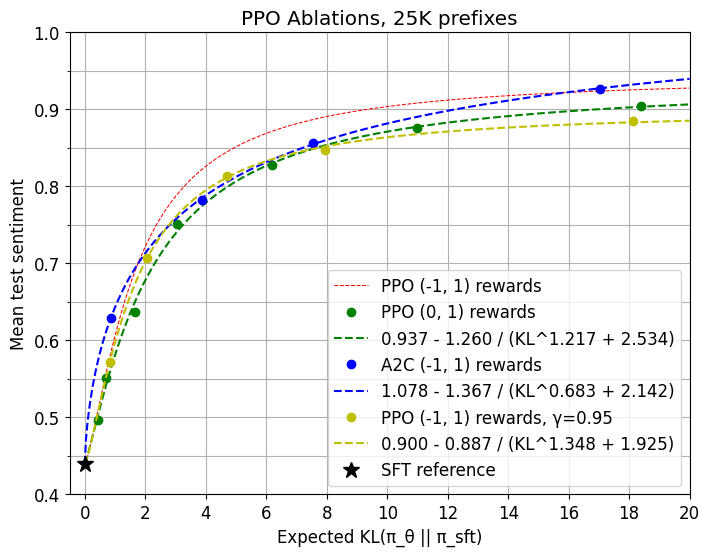

In [ ]:
ac2 = pd.read_csv(io.StringIO('''
0.6297017664,0.009945457892,0.8616726895,0.005814188312
0.9268275953,0.005336598426,17.04314883,0.09308318699
0.8570202953,0.007212000156,7.55319844,0.04545655588
0.7829446582,0.008505897852,3.866041274,0.02614064141
'''), header=None)

makeplot("PPO Ablations, 25K prefixes", [
  (ppo_normed[4], ppo_normed[2], 'r', 'PPO (-1, 1) rewards', True),
  (ppo[0], ppo[1], 'g', 'PPO (0, 1) rewards'),
  (ac2[2], ac2[0], 'b', 'A2C (-1, 1) rewards'),
  (ppo_gamma[5], ppo_gamma[3], 'y', 'PPO (-1, 1) rewards, γ=0.95')
])


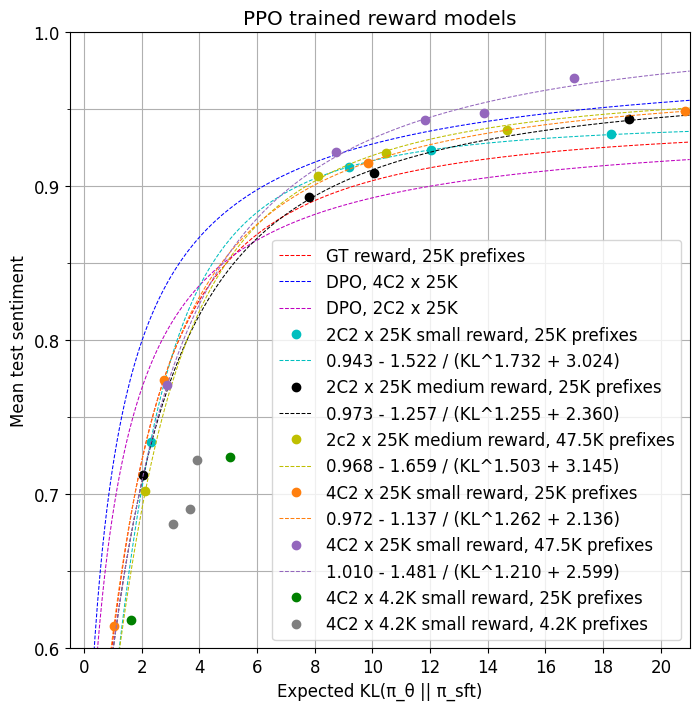

In [ ]:

reward_medium_2c2 = pd.read_csv(io.StringIO('''
DownwardSpiral33/gpt2-imdb-pos-2c2-reward-medium-256_0_2-2c2-2024.06.07.20.50,0.2,epoch 1,0.7123513904540081,0.009303472124263142,2.0569766173139215,0.012206684740110635,15.737413194444445
DownwardSpiral33/gpt2-imdb-pos-2c2-reward-medium-256_0_05-2c2-2024.06.07.21.46,0.2,epoch 1,0.8934000049552727,0.006331031469233515,7.784192340345019,0.040720856115107215,15.591145833333334
2c2-reward-medium-256_0_02-2024.06.08.10.45,0.02,epoch 1,0.9436564488389396,0.0047258297678467245,18.910401330225998,0.10362092493020504,15.381944444444445
2c2-reward-medium-256_0_035-2024.06.08.11.41,0.035,epoch 1,0.9086384810481023,0.005919287639967109,10.068255150897635,0.05343556761391189,15.8984375
'''), header=None)
# own reward fn
# 2c2-reward-medium-256_0_2-2c2-2024.06.07.20.50,0.2,epoch 1,0.7762638233976354,0.005738118858371391,2.0705717734009443,0.012151767866629989,15.710503472222221
# 2c2-reward-medium-256_0_05-2c2-2024.06.07.21.46,0.05,epoch 1,0.9179285437181129,0.003930488612888137,7.829911982123223,0.041447297025416094,15.64279513888889

reward_medium_2c2_2x_train = pd.read_csv(io.StringIO('''
2c2-reward-medium-256_0_05-2x-train-2024.06.08.12.36,0.05,epoch 1,0.9069806188860083,0.005960473610757592,8.128676553774211,0.04744079856340467,15.49435763888889
2c2-reward-medium-256_0_2-2x-train-2024.06.08.14.16,0.2,epoch 1,0.702152201779591,0.009414265288587312,2.1279749462329267,0.013018935630980154,15.496961805555555
2c2-reward-medium-256_0_022-2x-train-2024.06.08.22.22,0.022,epoch 1,0.9552903227716898,0.004197291839293205,22.84013145458367,0.13341332274077225,13.170572916666666
2c2-reward-medium-256_0_035-2x-train-2024.06.09.00.15,0.035,epoch 1,0.9218207112888623,0.0055054491986531555,10.461163884028792,0.06309724490874266,15.529947916666666
2c2-reward-medium-256_0_026-2x-train-2024.06.09.06.13,0.026,epoch 1,0.9364472823057086,0.00498006732690889,14.670942690430415,0.0985286467645346,15.35546875
'''), header=None)


reward_4c2 = pd.read_csv(io.StringIO('''
DownwardSpiral33/gpt2-imdb-pos-2c6-reward-roberta16-256_0_05-2024.06.07.21.56,0.2,epoch 1,0.9152241098744045,0.0057309491490596725,9.843347412016657,0.053401777913647225,15.618055555555555
DownwardSpiral33/gpt2-imdb-pos-2c6-reward-roberta16-256_0_2-2024.06.07.21.02,0.2,epoch 1,0.7744157898893036,0.008618187106411188,2.7593337083752782,0.016629919544638,15.52517361111111
ppo-4c2-reward-extratrain-256_0_02-2024.06.08.06.04,0.02,epoch 1,0.9491673891193133,0.00449730545681445,20.84236965742376,0.09622947752374021,15.947916666666666
ppo-4c2-reward-extratrain-256_0_5-2024.06.08.06.57,0.5,epoch 1,0.6148782714304212,0.01003304282918914,1.0366567730800145,0.005680546625900395,15.61935763888889
'''), header=None)
#own reward fn
# 2c6-reward-roberta16-256_0_2-2024.06.07.21.02,0.2,epoch 1,0.7483723377595324,0.006972652545486084,2.7473096491561995,0.016414826729674415,15.61935763888889
# 2c6-reward-roberta16-256_0_05-2024.06.07.21.56,0.05,epoch 1,0.9106861881313838,0.004619526249286293,9.891390457231966,0.053622446198420964,15.667100694444445

reward_4c2_d6_ppofull = pd.read_csv(io.StringIO('''
DownwardSpiral33/gpt2-imdb-pos-2c2-reward-256_0_2-6c2-d6-2024.06.07.22.35,0.2,epoch 1,0.6181675208998614,0.009969022423371046,1.613817520155054,0.008855923270612584,15.573784722222221
DownwardSpiral33/gpt2-imdb-pos-2c2-reward-256_0_05-6c2-d6-2024.06.07.23.50,0.2,epoch 1,0.7246024069357746,0.009168024241797856,5.062855505901906,0.0315857607855326,15.445746527777779
'''), header=None)

reward_4c2_ppo_2x = pd.read_csv(io.StringIO('''
ppo-4c2-reward-extratrain-256_0_05-2024.06.08.02.51,0.05,epoch 1,0.9221157127385848,0.0054888293506917514,8.721955295548671,0.04871436710538865,15.752604166666666
ppo-4c2-reward-extratrain-256_0_2-2024.06.08.04.28,0.2,epoch 1,0.7708716623894437,0.008657975062895978,2.8859311195556074,0.015978110737883553,15.686197916666666
ppo-4c2-reward-extratrain-256_0_035-2024.06.09.00.09,0.035,epoch 1,0.9428761724424375,0.0047465163698970116,11.814890417580804,0.0692399405882923,15.932291666666666
ppo-4c2-reward-extratrain-256_0_028-2024.06.09.06.10,0.028,epoch 1,0.947728302394416,0.004523120507662139,13.880548164248466,0.07496136803237646,15.881510416666666
ppo-4c2-reward-extratrain-256_0_0255-2024.06.09.11.54,0.0255,epoch 1,0.9705266732066017,0.003383302837949595,16.999514655106598,0.0948167351337858,15.955729166666666
'''), header=None)
# ppo-4c2-reward-extratrain-256_0_022-2024.06.08.22.31,0.022,epoch 1,0.9479160387430485,0.004552517995742055,31.963680280993383,0.4942966588722199,15.941840277777779


reward_2c2_small = pd.read_csv(io.StringIO('''
2c2-reward-small-256_0_05-2024.06.08.10.44,0.05,epoch 1,0.912934249029604,0.005782064819654309,9.183047285199994,0.04594004297010981,15.897569444444445
2c2-reward-small-256_0_2-2024.06.08.22.14,0.2,epoch 1,0.7342132515237962,0.009103668806227833,2.3064534857144787,0.013761122685117538,15.582465277777779
2c2-reward-small-256_0_022-2024.06.08.23.26,0.022,epoch 1,0.9338678576768997,0.00510068642728007,18.276498247765833,0.08012637354064023,15.92751736111111
2c2-reward-small-256_0_035-2024.06.09.08.08,0.035,epoch 1,0.923355718085923,0.005462765566067792,12.015743491757247,0.0576226800739946,15.969184027777779
'''), header=None)

reward_4c2d6_rewardprompts = pd.read_csv(io.StringIO('''
4c2-d6-reward-256_0_2-rewardprompts-2024.06.10.21.56,0.2,epoch 1,0.5659263156839844,0.010217108427873222,1.1907417538394738,0.008740333832486779,15.548177083333334
4c2-d6-reward-256_0_05-rewardprompts-2024.06.10.22.08,0.05,epoch 1,0.6807812016888369,0.009588078924486047,3.0924175318020084,0.021082688253295758,15.4453125
4c2-d6-reward-256_0_022-rewardprompts-2024.06.10.22.19,0.022,epoch 1,0.7223330743288443,0.00922783666345914,3.9312757892120214,0.026015245424372196,15.401041666666666
4c2-d6-reward-256_0_035-rewardprompts-2024.06.10.22.30,0.035,epoch 1,0.6904127481821484,0.009514532989232664,3.671022665091894,0.02528716185238579,15.430121527777779
'''), header=None)

makeplot("PPO trained reward models", [
  (ppo_normed[4], ppo_normed[2], 'r', 'GT reward, 25K prefixes', True),
  (xdpo, ydpo, 'b', 'DPO, 4C2 x 25K', True),
  # (dpo4c2[6], dpo4c2[4], 'c', 'DPO, 4 choose 2 x 25K/6 (25K pairs)', True),
  (dpo2c2[6], dpo2c2[4], 'm', 'DPO, 2C2 x 25K', True),
  # (dpo2c2_div36[6], dpo2c2_div36[4], 'y', 'DPO, 2 choose 2 x 25K/6 (4.2K pairs)'),
  # (dpo6c2_div36[6], dpo6c2_div36[4], 'g', 'DPO, 6 choose 2 x 25K/90 (4.2K pairs)'),
  (reward_2c2_small[5], reward_2c2_small[3], 'c', '2C2 x 25K small reward, 25K prefixes', False),
  (reward_medium_2c2[5], reward_medium_2c2[3], 'k', '2C2 x 25K medium reward, 25K prefixes', False),
  (reward_medium_2c2_2x_train[5], reward_medium_2c2_2x_train[3], 'y', '2c2 x 25K medium reward, 47.5K prefixes', False, True),
  (reward_4c2[5], reward_4c2[3], 'tab:orange', '4C2 x 25K small reward, 25K prefixes', False, True),
  (reward_4c2_ppo_2x[5], reward_4c2_ppo_2x[3], 'tab:purple', '4C2 x 25K small reward, 47.5K prefixes'),
  (reward_4c2_d6_ppofull[5], reward_4c2_d6_ppofull[3], 'g', '4C2 x 4.2K small reward, 25K prefixes', False, False),
  (reward_4c2d6_rewardprompts[5], reward_4c2d6_rewardprompts[3], 'tab:gray', '4C2 x 4.2K small reward, 4.2K prefixes', False, False),
], [0.6, 1], [-0.5, 21], [8,8], 0.75)

In [ ]:
reward_4c2_d6_ppofull

,0,1,2,3,4,5,6,7
0,DownwardSpiral33/gpt2-imdb-pos-2c2-reward-256_...,0.2,epoch 1,0.618168,0.009969,1.613818,0.008856,15.573785
1,DownwardSpiral33/gpt2-imdb-pos-2c2-reward-256_...,0.2,epoch 1,0.724602,0.009168,5.062856,0.031586,15.445747
